# Most Profitable Loan amount and Demographic for Prosper Loan Agency
## by Ugwuonah Faustina

## Investigation Overview


>  In this presentation, I will present the following features of interest; The demographic that is most beneficial to the company and the loan amount that produces the most yield. These were considered in order to inform the loan agency on how to increasing their profit. Hence, focus was mainly on the yield.


## Dataset Overview

>  This dataset contains information on loan disbursement activities by prosper loan agency over from 2005 to 2014. 871 duplicate loan entries were dropped, hence, there are 113,066 different loans that have been acquired from prosper loan agency and 15 columns holding information such as the percentage profit of the company per loan, resident state of borrower and even reason for taking out the loan.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan_data = pd.read_csv('prosperLoanData.csv')

In [3]:
#Drop all unnecessary columns from the loan dataset
loan_data.drop(['ListingKey', 'CreditGrade', 'ClosedDate', 
               'BorrowerAPR', 'BorrowerRate', 'EstimatedEffectiveYield', 
               'EstimatedLoss', 'EstimatedReturn', 'ProsperRating (numeric)', 
               'ProsperRating (Alpha)', 'ProsperScore', 'EmploymentStatusDuration', 
               'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 
               'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'FirstRecordedCreditLine', 
               'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 
               'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 
               'TotalInquiries', 'CurrentDelinquencies', 'AmountDelinquent', 
               'DelinquenciesLast7Years', 'PublicRecordsLast10Years', 'PublicRecordsLast12Months', 
               'RevolvingCreditBalance', 'BankcardUtilization', 'AvailableBankcardCredit', 
               'TotalTrades', 'TradesNeverDelinquent (percentage)', 'TradesOpenedLast6Months', 
               'DebtToIncomeRatio', 'IncomeRange', 'IncomeVerifiable', 
               'LoanKey', 'TotalProsperPaymentsBilled', 'ProsperPaymentsLessThanOneMonthLate', 
               'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 
               'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber', 
               'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginationDate', 
               'LoanOriginationQuarter', 'MemberKey', 'LP_CustomerPayments', 
               'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 
               'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 
               'LP_NonPrincipalRecoverypayments', 'PercentFunded', 'Recommendations', 
               'Investors'], axis = 1, inplace = True)

In [4]:
#Data wrangling
#Replace all spaces with _ and set all column headers to lowercase
loan_data.rename(columns=lambda x:x.strip().lower().replace(" ","_"), inplace=True)
#change the name of the column listing category
loan_data=loan_data.rename(columns={'listingcategory_(numeric)':'category'})

In [5]:
#Convert the datatype of the listing creation date to datetime and removing the time
loan_data['listingcreationdate']=pd.to_datetime(loan_data['listingcreationdate'])
loan_data['listingcreationdate'] = pd.DatetimeIndex(loan_data['listingcreationdate']).date
#Slice off numbers after the decimal point from the monthly income column
loan_data.statedmonthlyincome=loan_data.statedmonthlyincome.astype(str).str[:4].str.pad(7, fillchar=' ')
#Make a copy of the dataset
loan=loan_data.copy()

# Loan amount with the Yield most

## The most common loan amount

> Original amount collected in loan was plotted to discover the amount of loans a majority of the people take out. It was shown that the most collected loan amount was 4,000 dollars followed by 15,000 dollars. The biggest amount borrowed which was 35,000 had less than 1000 clients.

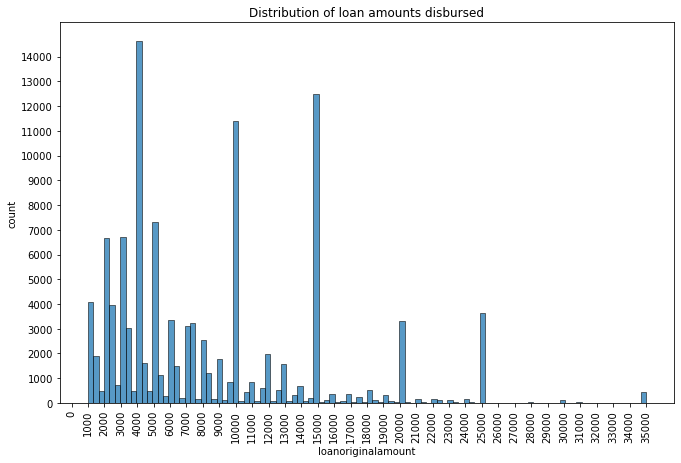

In [6]:
# To visualize the most common amount borrowed
plt.figure(figsize=[11,7])
color=sns.color_palette()[0]

sns.histplot(loan['loanoriginalamount'], kde=False);
plt.ylabel('count')
plt.yticks(np.arange(0, 14500+1, step=1000))
plt.xticks(np.arange(0, 35000+1, step=1000), rotation=90)
plt.title('Distribution of loan amounts disbursed');

## Relationship between yield and amount borrowed

> The hexagonal bin plot shows that the higher loans given out do not equate higher yield as the loans of 5000 dollars and below are shown to have the highest yields of >0.3%. The declining yield by year could possibly be as a result of bigger loans being issued in recent times.

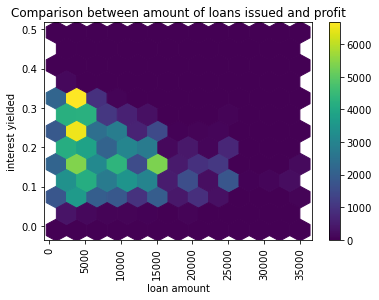

In [7]:
plt.hexbin(data=loan, x='loanoriginalamount', y='lenderyield', gridsize=12)
plt.colorbar()
plt.xlabel('loan amount')
plt.ylabel('interest yielded')
plt.xticks(rotation=90)
plt.title('Comparison between amount of loans issued and profit');

# Most Beneficial Demographic
## Employment Status 

>This plot shows clearly the gap between the employed and the unemployed as over 10,000 borrowers are counted to be employed while the unemployed count of below 20,000. This indicates that so many loan borrowers may find it easy to pay back the loan.

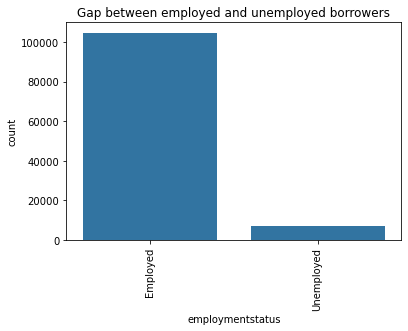

In [8]:
#Other is assumed to part of the employed group as it is possible that contract workers may fall under that group.
employed=['Employed', 'Full-time', 'Self-employed', 'Part-time', 'Other']
unemployed=['Retired', 'Not employed', 'Not available']
loan.employmentstatus.replace(to_replace=employed, value='Employed', inplace=True )
loan.employmentstatus.replace(to_replace=unemployed, value='Unemployed', inplace=True )

sns.countplot(data=loan, x='employmentstatus', color=color)
plt.xticks(rotation=90)
plt.title('Gap between employed and unemployed borrowers');

## Most Engaged State

> It is shown above that a great number of clients(>14,000) come from California, this is followed by Texas, Florida and New York. This could be due to better marketing strategies in California or it could be that the company has its headquaters in california and more resources are moved there. North Dakota on the other hand, has brought in only a few clients this could be due to the company recently starting up there. In all, the visualization above confirms that the Prosper loan company is a fast growing company with a lot of offices all over the U. S.

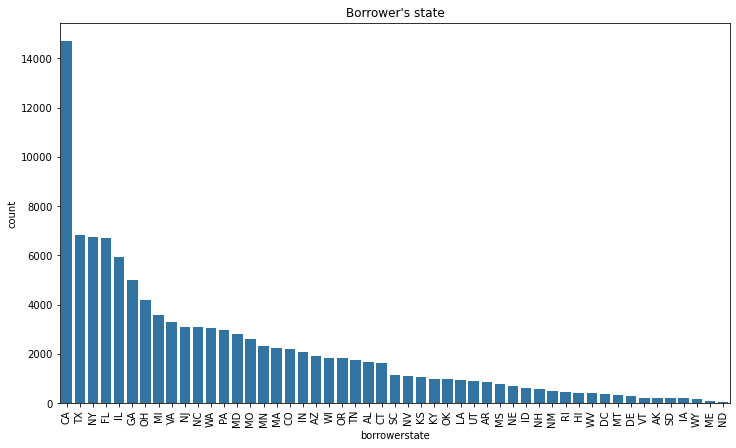

In [9]:
# Using seaborn's countplot function to plot a distribution of the states
plt.figure(figsize=[12,7])
color=sns.color_palette()[0]
order=loan['borrowerstate'].value_counts().index
sns.countplot(data=loan, x='borrowerstate',color=color, order=order)
plt.xticks(rotation=90)
plt.title("Borrower's state");

## Occupation more likely to take out loans
>Most of the Prosper loan clients were found to belong to the 'other' group. This is followed by clients who were engaged in professional work and then, executives, computer programmers and administrative assistants.

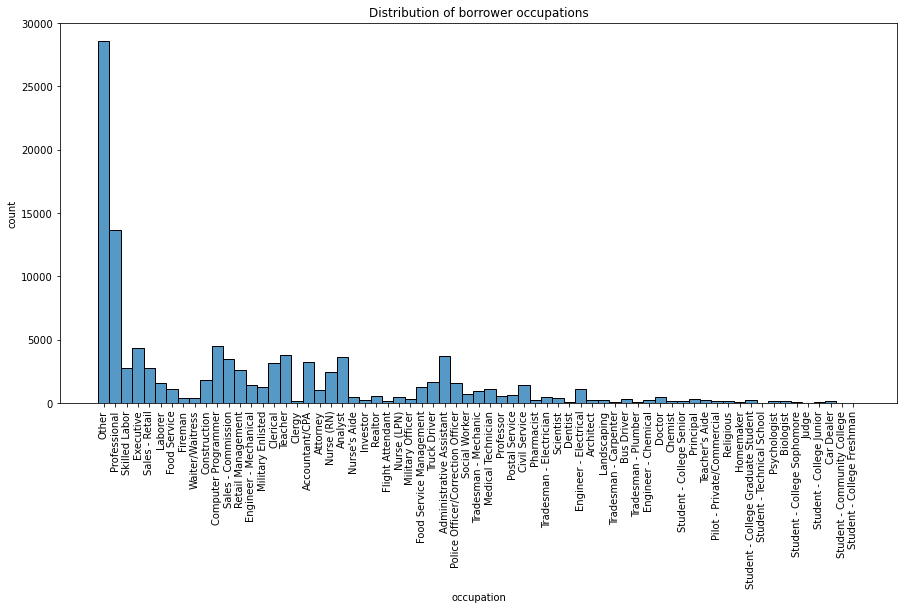

In [10]:
plt.figure(figsize=[15,7])
color=sns.color_palette()[0]

sns.histplot(loan['occupation'], kde=False);
plt.ylabel('count')
plt.xticks(rotation=90)
plt.title('Distribution of borrower occupations');

## Reasons to take out loans
> The category variable is numeric, the numbers (1-20) represent different reasons for taking out the loan. According to the table above, reason 1(Debt Consolidation) was the most common reason for taking out a loans. The least reasons for taking out loans were reasons 12(Green Loans) and 17(RV).

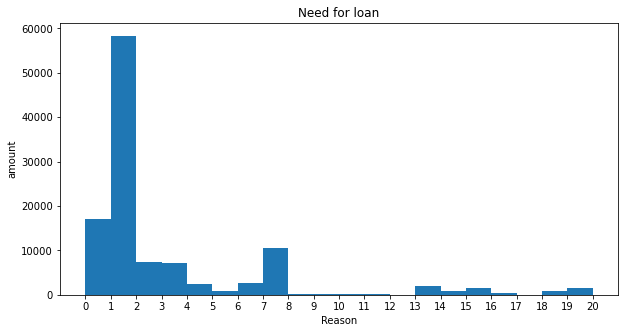

In [11]:
# Setting the bins before plotting
binsize = 1
bins = np.arange(0, 20+binsize, binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = loan, x = 'category', bins = bins)
plt.xticks(np.arange(0, 20+1, step=1))
plt.xlabel('Reason')
plt.ylabel('amount')
plt.title("Need for loan")
plt.show();

## The highest yielding states
> Most of the states seemed to produce a high yield. However, Iowa and Maine seemed to have yielded higher than the rest of the states. Even though these points are outliers, they are still the highest points in the map. While North Dakota has the highest lower boundary suggesting a high yield from the state.

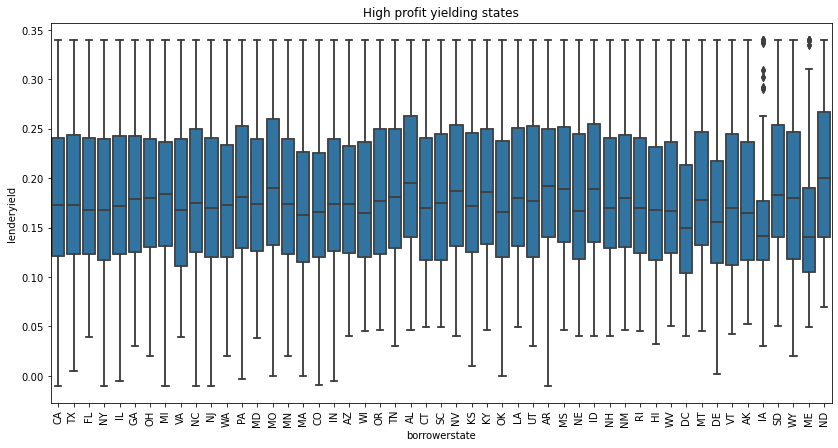

In [12]:
#Comparing borrowerstate to lender yield to know which state is more beneficial
states = ['CA', 'TX', 'FL', 'NY', 'IL', 'GA', 'OH', 'MI', 'VA', 'NC', 'NJ', 'WA', 'PA', 'MD', 'MO', 'MN', 'MA', 'CO', 'IN', 'AZ', 'WI', 'OR', 'TN', 'AL', 'CT', 'SC', 'NV','KS', 'KY', 'OK', 'LA', 'UT', 'AR', 'MS', 'NE', 'ID', 'NH', 'NM', 'RI', 'HI', 'WV', 'DC', 'MT', 'DE', 'VT', 'AK', 'IA', 'SD', 'WY', 'ME', 'ND']

category = pd.api.types.CategoricalDtype(ordered=True, categories=states)

# Use pandas.astype() to convert the "borrowerstate" column from a plain object type into an ordered categorical type 
loan['borrowerstate'] = loan['borrowerstate'].astype(category);

plt.figure(figsize = [14, 7])
base_color = sns.color_palette()[0]

sns.boxplot(data=loan, x='borrowerstate', y='lenderyield', color=base_color)
ax1 = sns.boxplot(data=loan, x='borrowerstate', y='lenderyield', color=base_color)
plt.xticks(rotation=90)
plt.title('High profit yielding states')
plt.ylim(ax1.get_ylim());

## Most profitable states and year
> The trend noticed from the plot indicates that as you scroll down the states, the number of loans issued reduces which means that the states with the most loans issued are at the top(California, Texas and Florida) while the states where the least loans issued have been issued are Wyoming, Maine and South Dakota. In majority of the states, it is noticed that in recent years from 2012 to 2014 a lot more loans were issued, however, the profits in these years is shown to reduce accross all states. Meanwhile the years 2008, 2009 and 2009, are seen to yield the most profit, while 2006 and 2014 are the years with the least profit accross all states.

In [13]:
#Change the date time format from dd/mm/yy to just year 
loan['listingcreationdate']=pd.to_datetime(loan['listingcreationdate'])
loan['listingcreationdate'] = pd.DatetimeIndex(loan['listingcreationdate']).year

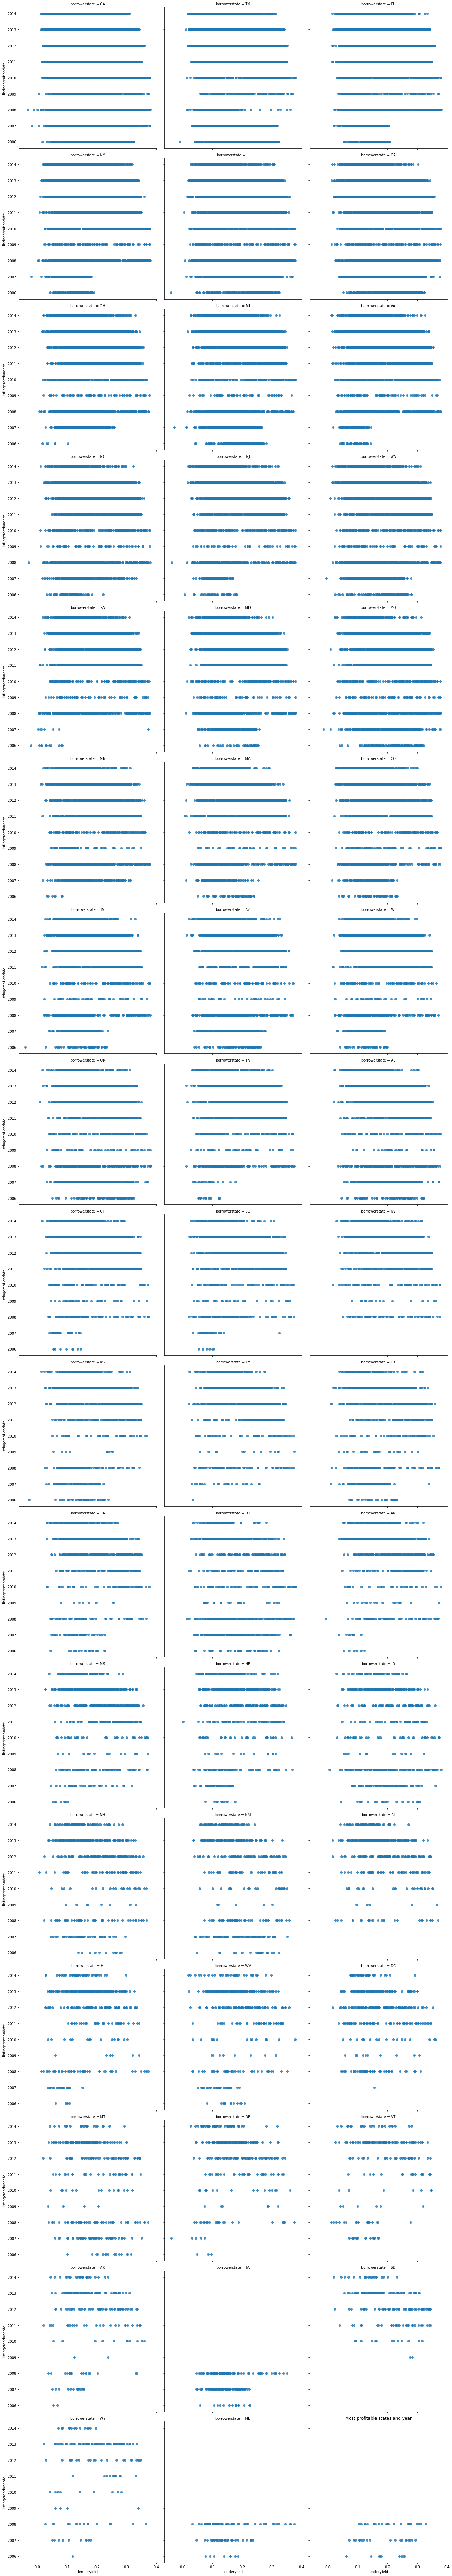

In [14]:
sns.lmplot(x='lenderyield', y='listingcreationdate', col='borrowerstate',
           data=loan, fit_reg=False, height=6, col_wrap=3, x_jitter=0.04)
ax = plt.gca() 
ax.set_title('Most profitable states and year', loc='center');

## Conclusion

The demographic that is most beneficial to the company and the loan amount that produces the most yield were the key insights presented. After visualizations, It was discovered that the demographic most beneficial to the company are borrowers mostly students in California who take out loans of 5000 dollars and below. This is because a greater percent of their customer base were mostly residents of California and the student communities wherein majority was recorded to take loans below 5000 dollars. California could also have more clients a result of more efficient marketing protocols put in place and the fact that it could be the headquaters of the company, hence existing for longer than other branch offices. California is also the state with the highest loans issued, closely followed by Texas and Florida. The loan amount that produced the most yield was 5000 dollars and below and when loan amount was compared to yield, loans less than or equal to 5000 dollars were found to yield a lot more than loans greater than 5000 dollars. To increse yield, it would be advisable for more efficient marketing strategies to be devised such as the one used in California and targeted to directed at all occupations especially student and homemaker populations. It would also be advisable that smaller loans be issued out more than bigger loans in general

In [17]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_Prosper_Loan_Data.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_Prosper_Loan_Data.ipynb to slides
[NbConvertApp] Writing 1620948 bytes to Part_II_Prosper_Loan_Data.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\User\Documents\Anaconda\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\User\Documents\Anaconda\lib\site-packages\jupyter_core\application.py", line 264, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\User\Documents\Anaconda\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
    app.start()
  File "C:\Users\User\Documents\Anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 369, in start
    self.convert_notebooks()
  File "C:\Users\User\Documents\Anaconda\lib\site-packages\nbconvert\nbconvertapp.py", line 541, in convert_notebooks
    s